In [327]:
!pip install matplotlib;
!pip install pandas;
!pip install seaborn;
!pip install scikit-learn
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
from sklearn.model_selection import train_test_split

## Red Wine Quality Dataset

The Kaggle Red Wine Quality dataset includes 11 physiochemical variables (inputs) as predictors for a sensory quality rating (output) for 1599 samples of Portuguese Vinho Verde red wine. From https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine, the variables are as follows:

Inputs:

1. fixed acidity: The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine. They mostly consist of tartaric, malic, citric or succinic acid that mostly originate from the grapes used to ferment the wine. They also do not evaporate easily. (g / dm^3)

2. volatile acidity: Acids that evaporate at low temperatures—mainly acetic acid which can lead to an unpleasant, vinegar-like taste at very high levels. (g / dm^3)

3. citric acid: Citric acid is used as an acid supplement which boosts the acidity of the wine. It's typically found in small quantities and can add 'freshness' and flavor to wines. (g / dm^3)

4. residual sugar: The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines residual sugar level greater than 45 grams/liter are considered sweet. On the other end of the spectrum, a wine that does not taste sweet is considered as dry. (g / dm^3)

5. chlorides: The amount of chloride salts (sodium chloride) present in the wine. (g / dm^3)

6. free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. All else constant, the higher the free sulfur dioxide content, the stronger the preservative effect. (mg / dm^3)

7. total sulfur dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (mg / dm^3)

8. density: The density of wine juice depending on the percent alcohol and sugar content; it's typically similar but higher than that of water (wine is 'thicker'). (g / cm^3)

9. pH: A measure of the acidity of wine; most wines are between 3-4 on the pH scale. The lower the pH, the more acidic the wine is; the higher the pH, the less acidic the wine. (The pH scale technically is a logarithmic scale that measures the concentration of free hydrogen ions floating around in your wine. Each point of the pH scale is a factor of 10. This means a wine with a pH of 3 is 10 times more acidic than a wine with a pH of 4)

10. sulphates: Amount of potassium sulphate as a wine additive which can contribute to sulfur dioxide gas (S02) levels; it acts as an antimicrobial and antioxidant agent.(g / dm3)

11. alcohol: How much alcohol is contained in a given volume of wine (ABV). Wine generally contains between 5–15% of alcohols. (% by volume)

Output:

12. quality: score between 0 (very bad) and 10 (very excellent) by wine experts

In [328]:
# Loading the data

github_url = 'https://raw.githubusercontent.com/nicholasaxl/datathon-jan-2024/main/winequality-red.csv'
pd.read_csv(github_url)
wine_data = pd.read_csv(github_url)
print('Wine Quality Dataset:')
print(wine_data.head())

Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

## Exploratory Data Analysis

To begin with, we can assess the cleanliness of the data and visualize the trends in the variables.

### Check for missing values

In [329]:
# Checking for missing values

null_values = wine_data.isnull().sum()
print(null_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Datatypes

In [330]:
# Get data types of variables

data_types = wine_data.dtypes
print(data_types)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Summary Statistics

In [331]:
# Get summary statistics

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [332]:
# Range of quality

unique_quality_values = wine_data['quality'].unique()

print("Unique values in the 'quality' column:")
print(unique_quality_values)

Unique values in the 'quality' column:
[5 6 7 4 8 3]


The quality ratings in this dataset only range from 3 to 8.

### Histograms and Trends

<Figure size 2000x1500 with 0 Axes>

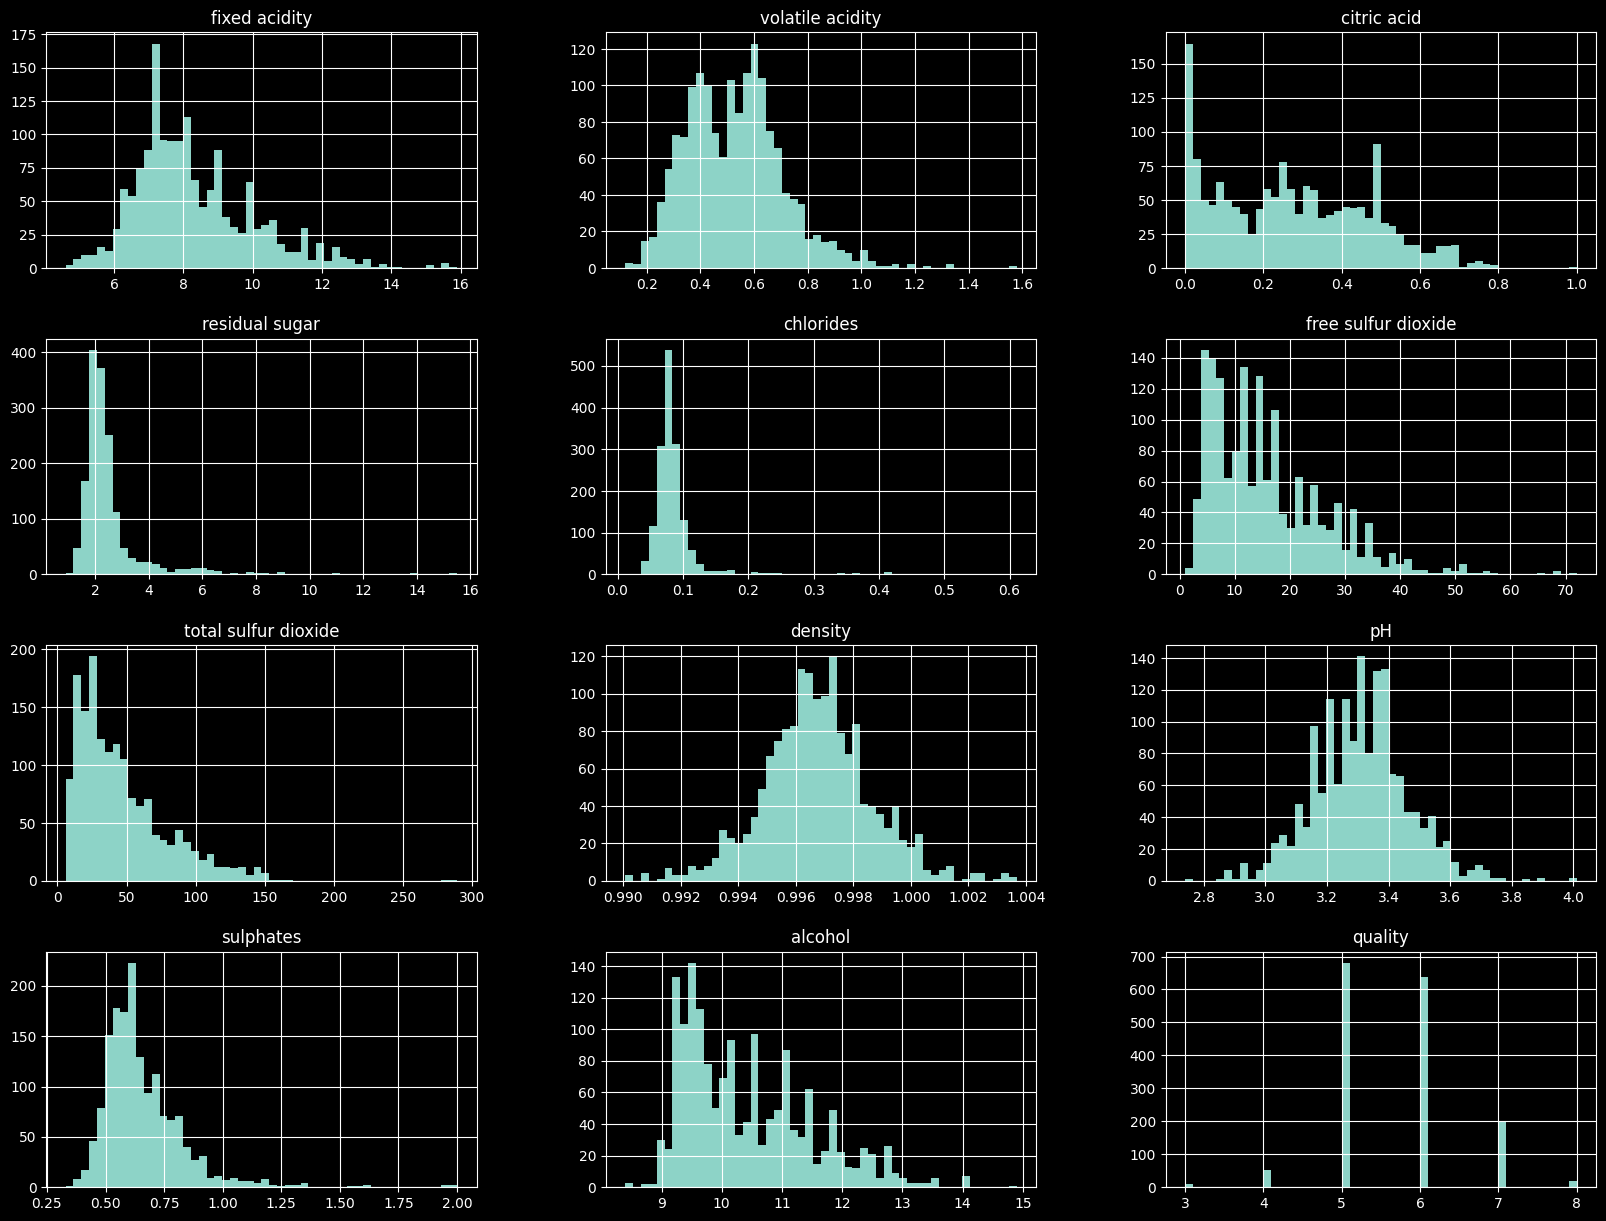

In [333]:
# Generate histograms

plt.figure(figsize=(20, 15))
wine_data.hist(bins=50, figsize=(20,15))
plt.show()

Density, pH, and quality seem to have symmetric distributions, while all the other variables exhibit right-skewed distributions. Notably, the majority of the wine samples are rated 5 or 6.

<Figure size 2000x1500 with 0 Axes>

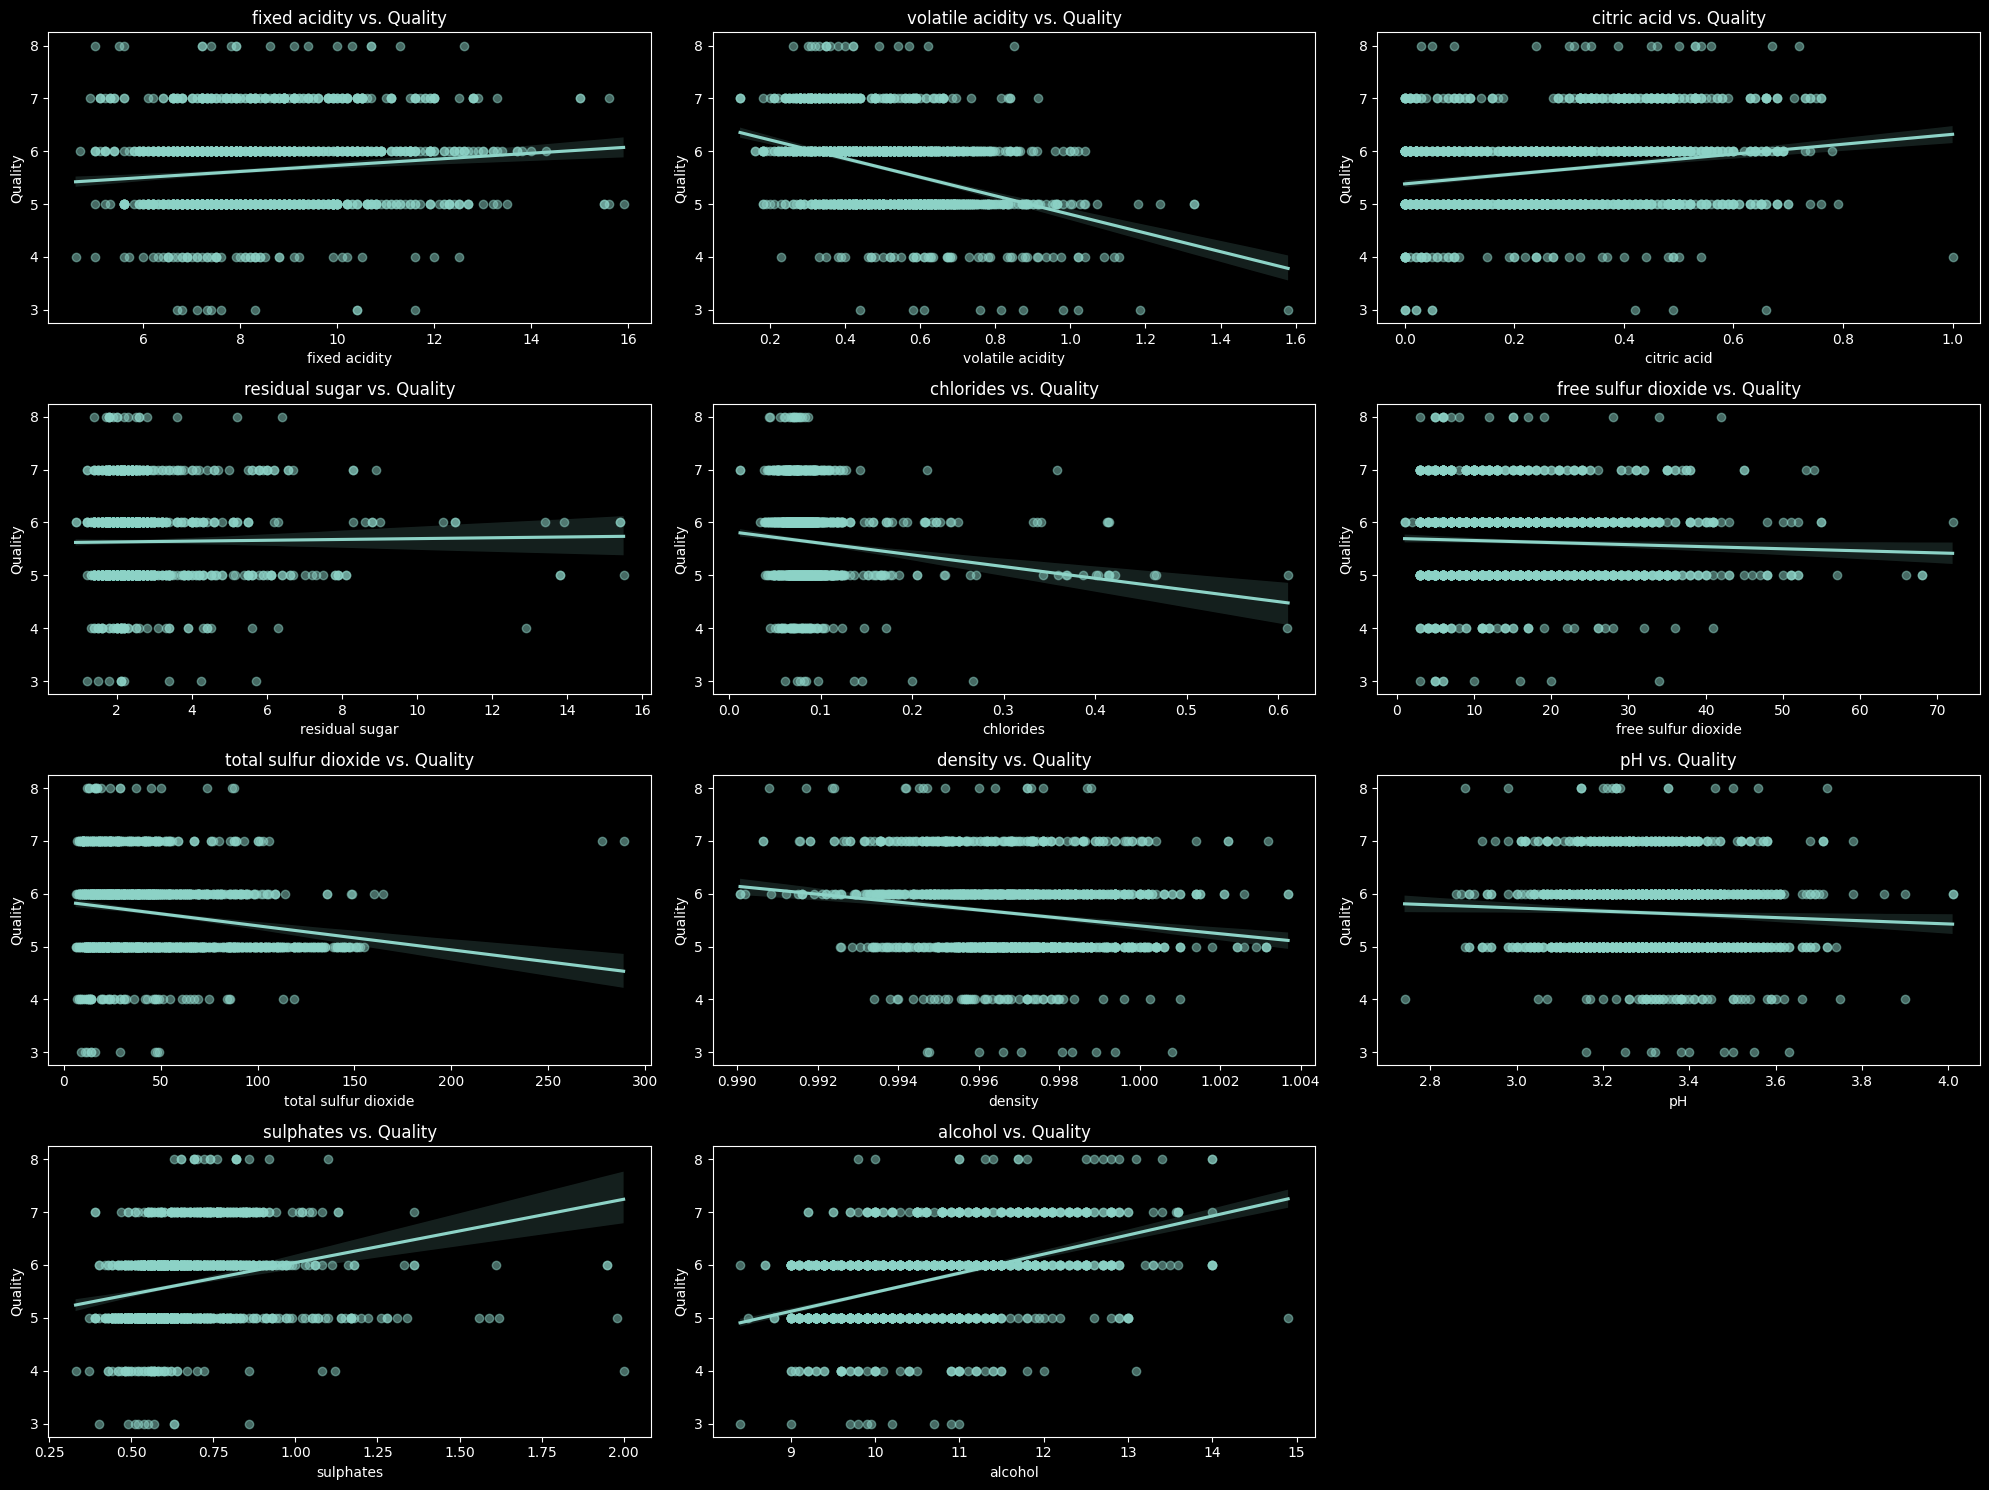

In [334]:
# Plotting input variables against quality

plt.figure(figsize=(20, 15))
columns_to_plot = wine_data.columns[:-1]

plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(4, 3, i)
    sns.regplot(x=column, y='quality', data=wine_data, scatter_kws={'alpha':0.5})
    plt.title(f'{column} vs. Quality')
    plt.xlabel(column)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()

Since quality only takes on integer values, the plots are a bit difficult to interpret. However, the trendlines show the overall correlation between the variables.

### Correlation Heatmap

We can also use a correlation heatmap to visualize the trends in the data.

<Axes: >

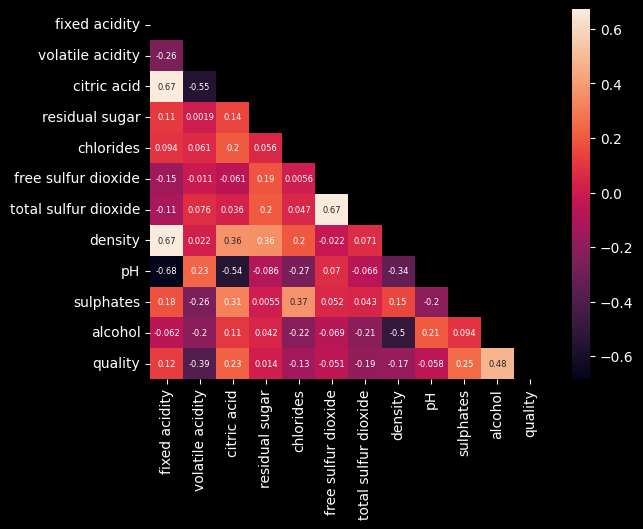

In [335]:
# Generate lower triangle correlation heatmap

corr = wine_data.corr()
tri = np.triu(corr)
sns.heatmap(wine_data.corr(), annot=True, mask=tri, annot_kws={"size": 6})

With respect to quality, we can see that alcohol has the strongest positive correlation with quality, followed by sulphates and citric acid, while volatile acidity has the strongest negative correlation. All the other variables have fairly weak correlations with quality.

## Predictive Modeling

We want to be able to predict the quality of a wine given the values of its physiochemical variables. We will compare a variety of methods below.

### Linear Regression

First, we will test a basic linear model using all of the independent variables as predictors.

In [336]:
# Separate input and output

x = wine_data.drop('quality',axis = 1)
y = wine_data['quality']

In [337]:
# Train-test split
import random
from sklearn.preprocessing import StandardScaler

random_seed = 54

np.random.seed(random_seed)
random.seed(random_seed)

x_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = random_seed)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unscaled)
x_test = scaler.transform(x_test_unscaled)

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression().fit(x_train, y_train)
lmcoef = pd.DataFrame(lm.coef_, x_train_unscaled.columns, columns = ['Coefficients'])
print(lmcoef)

#prediction on train
#linear regression with quality being continuous variable

print('train R^2:',lm.score(x_train, y_train))


y_pred_train = lm.predict(x_train)
print('train MSE:',mean_squared_error(y_train, y_pred_train))

#prediction on test
print('test R^2:', lm.score(x_test, y_test))
y_pred_test = lm.predict(x_test)
print('test MSE:', mean_squared_error(y_test, y_pred_test))

                      Coefficients
fixed acidity             0.021375
volatile acidity         -0.169669
citric acid              -0.027473
residual sugar            0.022711
chlorides                -0.100762
free sulfur dioxide       0.060098
total sulfur dioxide     -0.109199
density                  -0.028737
pH                       -0.095293
sulphates                 0.154791
alcohol                   0.321023
train R^2: 0.3745868448083385
train MSE: 0.4085400688212857
test R^2: 0.3203411535420244
test MSE: 0.44064253554539984


To visualize our fit, we can use plot the residuals against the predicted values. The shape of the resulting scatterplot can be explained by the fact that all the true values are integers.

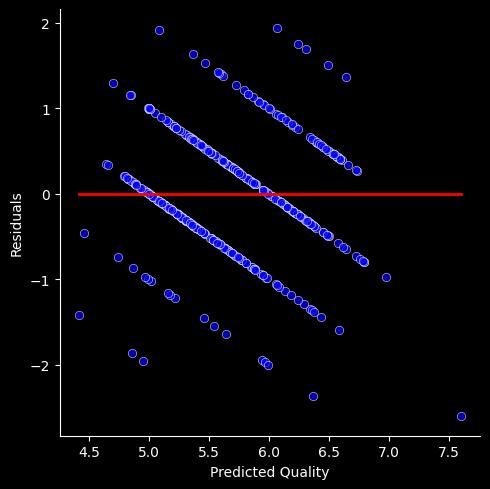

In [339]:
residuals = np.asarray(y_test) - y_pred_test

sns.relplot(x = y_pred_test, y = residuals, color = 'blue', alpha = 0.7, kind ='scatter')
sns.lineplot(x = y_pred_test, y = 0, color='red', linestyle = '-', linewidth = 2)
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.show()

Since the true values are integers, we can round the values outputted by the linear regression model to the nearest integer. In doing so, we can measure the accuracy of the model.

In [340]:
# Round values and treat as classification task

from sklearn.metrics import accuracy_score

y_pred_train_rounded = np.rint(y_pred_train)
y_pred_test_rounded = np.rint(y_pred_test)
print('Train accuracy:', accuracy_score(y_train, y_pred_train_rounded))
print('Test accuracy:', accuracy_score(y_test, y_pred_test_rounded))

Train accuracy: 0.5996425379803396
Test accuracy: 0.6


We can also perform a LASSO regression on the data to select the most significant features.

In [341]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

wine_lasso_cv = LassoCV(alphas = None, cv = 5)
wine_lasso_cv.fit(x_train, y_train)
predictions = wine_lasso_cv.predict(x_test)
r2 = r2_score(y_test, predictions)

print("Optimal alpha:", wine_lasso_cv.alpha_)
wine_lasso_cv_coeff = pd.DataFrame(wine_lasso_cv.coef_, x_train_unscaled.columns, columns = ['Coefficients'])
print(wine_lasso_cv_coeff)
print("R-squared on Test Set:", r2)

Optimal alpha: 0.012403675035831445
                      Coefficients
fixed acidity             0.000000
volatile acidity         -0.160182
citric acid              -0.000000
residual sugar            0.000000
chlorides                -0.083066
free sulfur dioxide       0.027274
total sulfur dioxide     -0.074124
density                  -0.000000
pH                       -0.073345
sulphates                 0.132851
alcohol                   0.327650
R-squared on Test Set: 0.3237491845641043


In [342]:
from sklearn.metrics import accuracy_score
y_pred_test_rounded = np.rint(predictions)
print('Test accuracy:', accuracy_score(y_test, y_pred_test_rounded))

Test accuracy: 0.5916666666666667


Since the LASSO model has fewer parameters, the accuracy is lower, as expected. However, the coefficients demonstrate that the variables citric acid, residual sugar, chlorides, and density are not important enough to be significant.

### Decision Tree

We can also fit a decision tree over all the independent variables. To limit complexity, we will limit the maximum depth to 5.

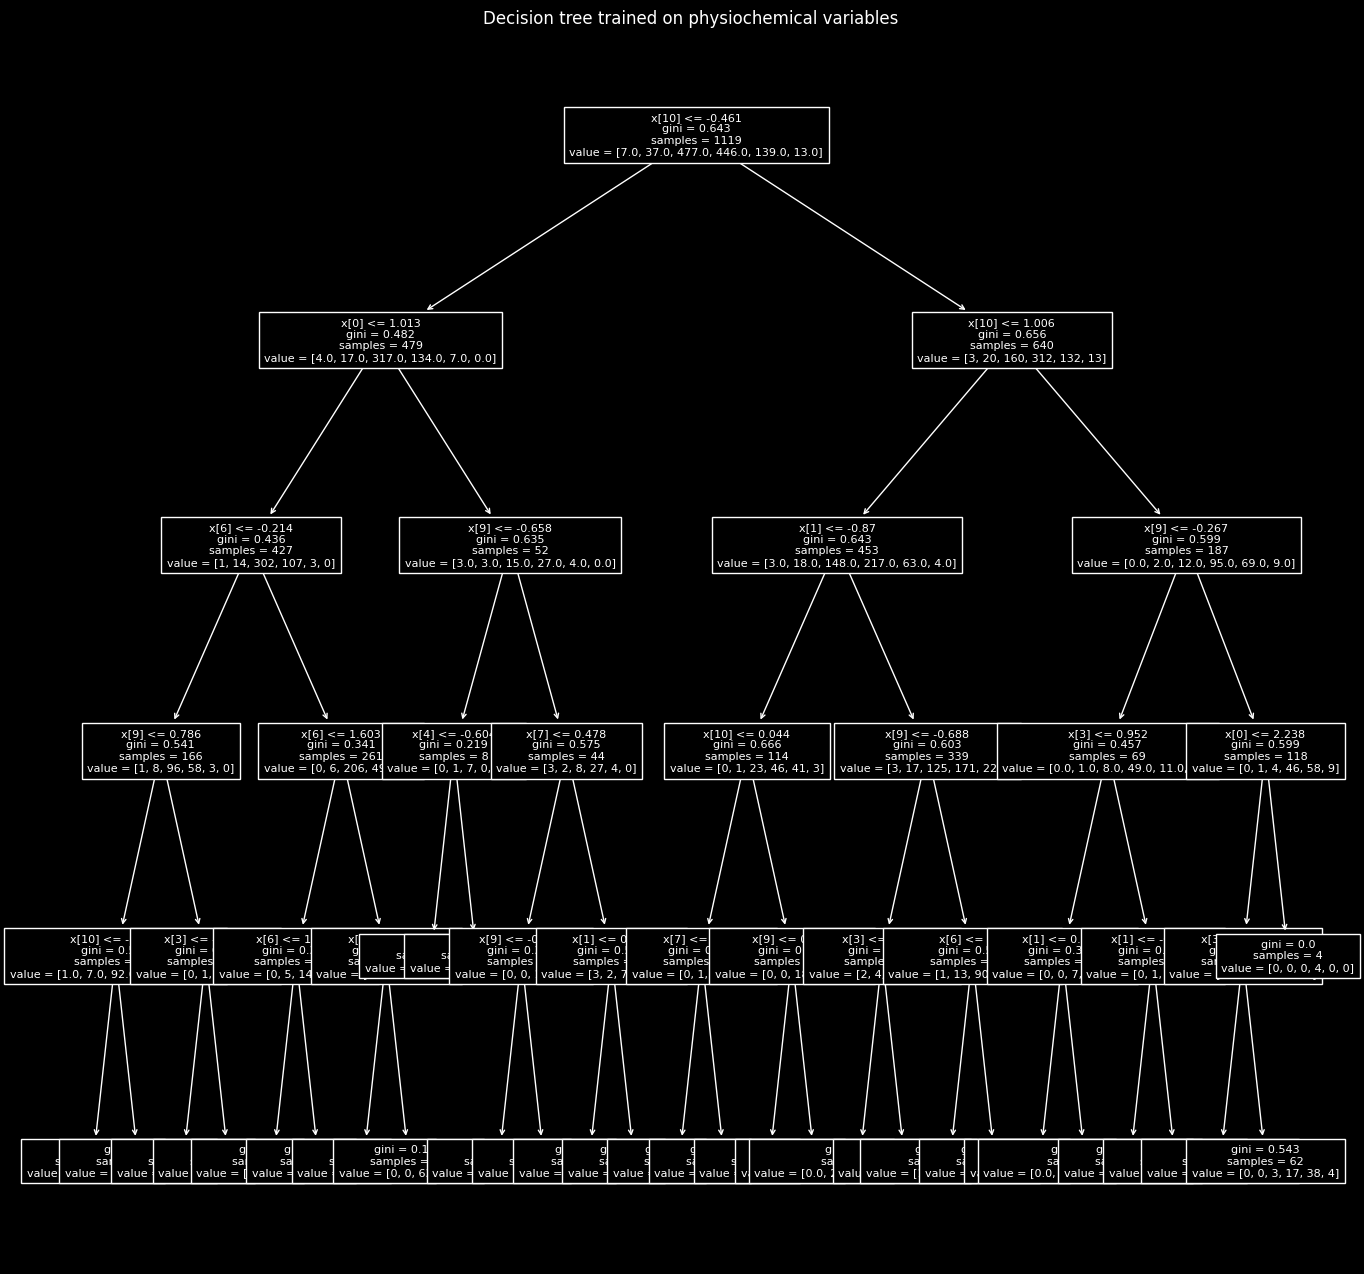

In [343]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

y_train_cat = y_train.astype('category')
dt = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
plt.figure(figsize = (16,16))
plot_tree(dt, filled = False, fontsize = 8)
plt.title("Decision tree trained on physiochemical variables")
plt.show()



To visualize the inaccurate predictions, we can draw the confusion matrix. Ideally, we want the diagonal going from the top left to the bottom right to be the most populated because that would indicate a large number of correct predictions.

[5 5 6 ... 5 6 5]
[[  0   0   2   5   0   0]
 [  0   3  13  20   1   0]
 [  0   0 364 104   9   0]
 [  0   0 106 306  34   0]
 [  0   0  13  50  76   0]
 [  0   0   2   7   4   0]]


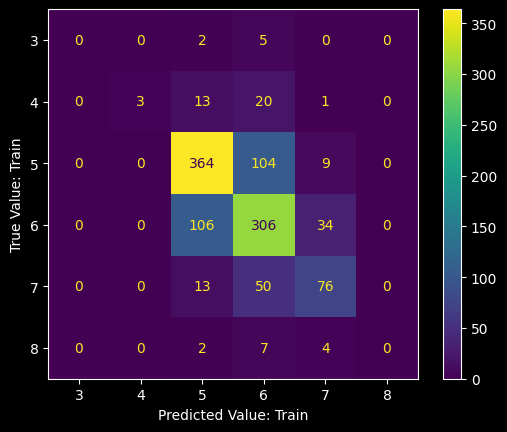

In [344]:
# Display confusion matrices

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred_tree_train = dt.predict(x_train)
print(y_pred_tree_train)
train_cm = confusion_matrix(np.asarray(y_train_cat), y_pred_tree_train)
print(train_cm)
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels = dt.classes_)
disp_train.plot()
plt.xlabel('Predicted Value: Train')
plt.ylabel('True Value: Train')
plt.show()


[[  0   0   2   1   0   0]
 [  0   0   9   6   1   0]
 [  0   1 142  59   2   0]
 [  0   0  54 120  18   0]
 [  0   0   2  40  18   0]
 [  0   0   1   3   1   0]]


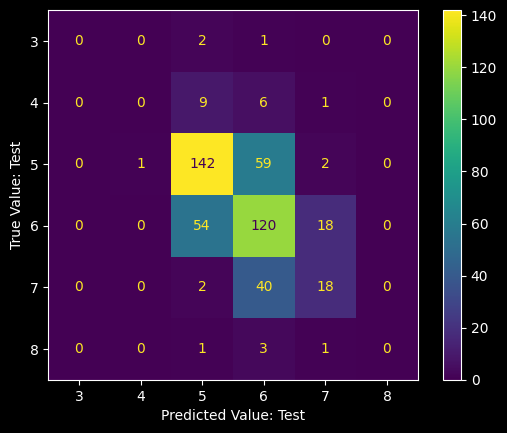

In [345]:
y_pred_tree_test = dt.predict(x_test)
y_test_cat = y_test.astype('category')
test_cm = confusion_matrix(np.asarray(y_test_cat), y_pred_tree_test)
print(test_cm)
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels = dt.classes_)
disp_test.plot()
plt.xlabel('Predicted Value: Test')
plt.ylabel('True Value: Test')
plt.show()

In [346]:
print('Train Accuracy:', accuracy_score(y_train_cat, y_pred_tree_train))
print('Test Accuracy:', accuracy_score(y_test_cat, y_pred_tree_test))


Train Accuracy: 0.6693476318141197
Test Accuracy: 0.5833333333333334


For this particular train-test split, the linear model with rounding has better predictive power than the decision tree with depth 5.

### XGBoost

Since we have a relatively small number of fully numeric features, XGBoost should be a good fit for this dataset.

In [347]:
!pip install xgboost
from xgboost import XGBClassifier

XGBoost requires the prediction categories to be in the form of [0,1,2,3,4...]. Due to this, we are not able to immediately input it as our unique categories are [3,4,5,6,7,8]. We fix this by reducing the counts by 3 and labeling it correctly after fitting the model

In [348]:
quality_categories = [3, 4, 5, 6, 7, 8]
y_train_cat_arr = np.asarray(y_train_cat)
y_test_cat_arr = np.asarray(y_test_cat)
y_train_cat_2 = y_train_cat_arr - 3
y_test_cat_2 = y_test_cat_arr - 3
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train_cat_2)
y_pred_xg = xgb_model.predict(x_test)
accuracy = accuracy_score(y_test_cat_2, y_pred_xg)
accuracy

0.6645833333333333

[[  0   0   2   1   0   0]
 [  0   1  10   4   1   0]
 [  1   0 160  41   2   0]
 [  0   3  45 126  18   0]
 [  0   0   5  20  32   3]
 [  0   0   0   3   2   0]]


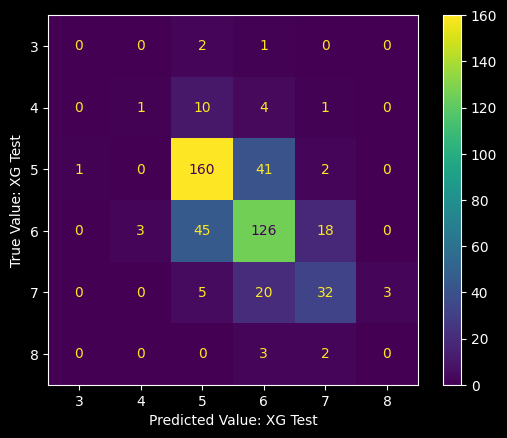

In [349]:
test_cm_2 = confusion_matrix(np.asarray(y_test_cat_2), y_pred_xg)
print(test_cm_2)
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm_2, display_labels = dt.classes_)
disp_test.plot()
plt.xlabel('Predicted Value: XG Test')
plt.ylabel('True Value: XG Test')
plt.show()

The accuracy for the XGBoost model is the highest of all so far.

### Neural Network

As an exercise, we also decided to predict quality using a neural network. We will use one-hot encoding to represent the quality variable categorically and create a Dense neural network in PyTorch to predict the probability that each of the output classes is correct.

In [350]:
!pip install torch

In [383]:
import torch
import torch.nn as nn
import torch.optim as optim

class DenseNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.3):
        super(DenseNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.relu = nn.ReLU()  
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3= nn.ReLU()  
        self.dropout3 = nn.Dropout(dropout_prob)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.dropout4 = nn.Dropout(dropout_prob)
        self.fc5 = nn.Linear(hidden_size, output_size) 
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

# One hot encoding for y
y_train_onehot = np.zeros(shape=(len(y_train), 6))
for i, j in enumerate(y_train):
    y_train_onehot[i][j - 3] = 1
y_test_onehot = np.zeros(shape=(len(y_test), 6))
for i, j in enumerate(y_test):
    y_test_onehot[i][j - 3] = 1

x_test_tensor = torch.tensor(np.asarray(x_test), dtype=torch.float32)
y_test_tensor = torch.tensor(np.asarray(y_test_onehot), dtype=torch.float32)
x_train_tensor = torch.tensor(np.asarray(x_train), dtype=torch.float32)
y_train_tensor = torch.tensor(np.asarray(y_train_onehot), dtype=torch.float32)


torch.manual_seed(42)

input_size = 11 # 11 predictors
hidden_size = 16 # 16 nodes per hidden layer
output_size = 6 # 6 possible output classes

model = DenseNN(input_size, hidden_size, output_size)

print(model)


criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
training_loss = []
test_loss = []
for epoch in range(num_epochs):
   
    outputs_train = model(x_train_tensor)
    outputs_test = model(x_test_tensor)
 
    train_loss_step = criterion(outputs_train, y_train_tensor)
    test_loss_step = criterion(outputs_test, y_test_tensor)
    optimizer.zero_grad()
    train_loss_step.backward()
    optimizer.step()
    training_loss.append(train_loss_step.item())
    test_loss.append(test_loss_step.item())
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss_step.item():.4f}')

x_test_tensor = torch.tensor(np.asarray(x_test), dtype=torch.float32)
winne_output = model(x_test_tensor)


print(winne_output)

DenseNN(
  (fc1): Linear(in_features=11, out_features=16, bias=True)
  (relu): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=16, out_features=16, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=16, out_features=16, bias=True)
  (dropout4): Dropout(p=0.3, inplace=False)
  (fc5): Linear(in_features=16, out_features=6, bias=True)
  (sigmoid): Sigmoid()
)
Epoch [1/20], Loss: 1.8055
Epoch [2/20], Loss: 1.8050
Epoch [3/20], Loss: 1.8027
Epoch [4/20], Loss: 1.8028
Epoch [5/20], Loss: 1.8000
Epoch [6/20], Loss: 1.7997
Epoch [7/20], Loss: 1.7969
Epoch [8/20], Loss: 1.7956
Epoch [9/20], Loss: 1.7942
Epoch [10/20], Loss: 1.7933
Epoch [11/20], Loss: 1.7934
Epoch [12/20], Loss: 1.7911
Epoch [13/20], Loss: 1.7892
Epoch [14/20], Loss: 1.7888
Epoch [15/20], Loss: 1.7871
Epoch [16/20], Loss: 1.7860

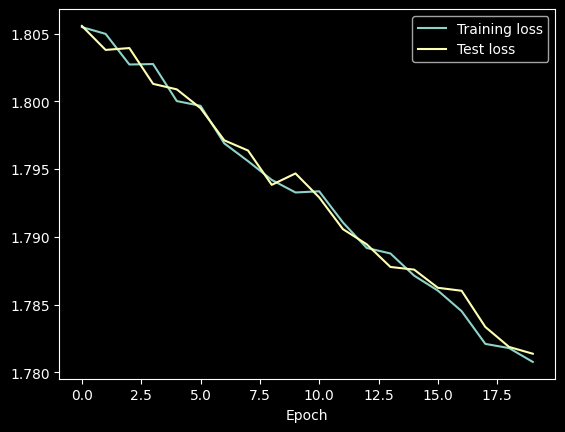

In [384]:
plt.plot(training_loss, label='Training loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epoch')
plt.legend()

In [385]:
max_indices = torch.argmax(winne_output, dim=1)+3
print("Vector of indices of the max value for each row:")
print(max_indices)

Vector of indices of the max value for each row:
tensor([6, 6, 6, 6, 6, 8, 6, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 4, 6, 6, 6, 8, 8, 6,
        6, 4, 8, 6, 6, 4, 6, 6, 4, 6, 6, 6, 6, 6, 8, 6, 6, 6, 4, 6, 6, 6, 4, 6,
        6, 6, 6, 4, 8, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 8, 4, 6, 6,
        6, 4, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8,
        6, 6, 4, 6, 4, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 8, 6, 5, 5, 5, 4,
        6, 6, 4, 6, 6, 6, 6, 4, 6, 4, 6, 5, 8, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 6, 6, 6, 6, 6, 4, 6, 8, 6, 8, 6, 4, 4, 6, 6, 4, 6, 6, 4, 4, 6, 6,
        6, 6, 8, 8, 6, 4, 4, 4, 4, 6, 6, 8, 6, 8, 6, 6, 6, 4, 6, 6, 6, 8, 8, 6,
        6, 6, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 4, 6, 8, 4, 8,
        8, 8, 6, 5, 6, 6, 6, 4, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 6, 8, 5, 6, 4, 8, 4, 6, 6, 4, 6, 8, 6, 6, 4, 6, 6, 4, 8, 6, 6,
        6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 4, 8, 6, 6, 6, 8, 6, 8, 6, 4, 4, 

In [386]:
max_indices.unique()

tensor([4, 5, 6, 8])

In [387]:
print('Test Accuracy:', accuracy_score(max_indices, y_test))

Test Accuracy: 0.29375


[[  0   0   0   3   0   0]
 [  0   0   3  13   0   0]
 [  0   0  25 179   0   0]
 [  0   0  20 172   0   0]
 [  0   0   8  52   0   0]
 [  0   0   1   4   0   0]]


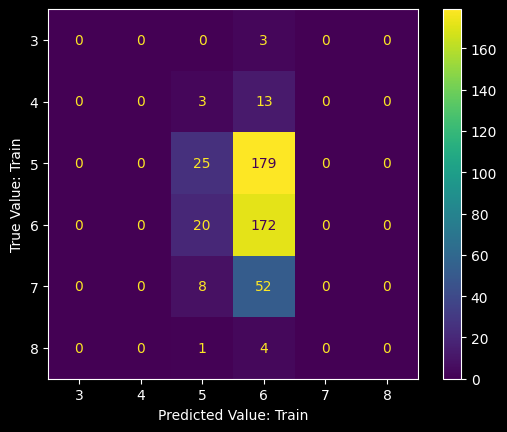

In [376]:
test_nncm = confusion_matrix(y_test,np.asarray(max_indices))
print(test_nncm)
disp_train = ConfusionMatrixDisplay(confusion_matrix=test_nncm, display_labels = dt.classes_)
disp_train.plot()
plt.xlabel('Predicted Value: Train')
plt.ylabel('True Value: Train')
plt.show()

Our neural network had the lowest accuracy out of all of our methods. We think this is due to the fact that the distribution of quality is very dense around 5 and 6, and the neural network had too much unnecessary complexity given the simplicity of the data. We intentionally left the number of epochs a bit lower to get a wider range of predictions, but the truth is that a better model would have only predicted a quality of 5 and 6. We tried increasing the number of epochs, and the neural network also converged to outputting either only 5 or 6, but the accuracy still ended up being lower than the other models.

## Conclusion

We employed OLS linear regression, LASSO regression, a decision tree, XGBoost, and a neural network to predict the quality of wine based on the input variables. The most accurate model was the XGBoost tree at 66.5% accuracy on the test set followed by the OLS linear regression with rounded values at 60% accuracy on the test set. We think that the data has a large proportion of variance unexplained by the parameters since quality rating for each wine is subject to human error and biases, so we are satisfied with these model accuracies.

For future improvements, we could optimize the design of the neural network to further capture the structure of the data. Admittedly, our current neural network performed very poorly, but it is also possible that a neural network is just unsuitable for this dataset.
